### Applying Traditional Machine Learning Algorithm 
#### Md. Asifur Rahman Asif
#### ID: 18.02.04.114

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Load data

In [2]:
df = pd.read_csv("FloodTrain.csv")
#test = pd.read_excel("FloodTest.xlsx")

display(df.head(10))

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN
5,5,Barisal,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06,1.0
6,6,Barisal,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.7,90.36,4,1949.07,1.0
7,7,Barisal,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.7,90.36,4,1949.08,1.0
8,8,Barisal,1949,9,34.8,25.7,252.0,83.0,0.937037,4.8,4.823404,41950,536809.8,510151.9,22.7,90.36,4,1949.09,NaN
9,9,Barisal,1949,10,34.0,24.7,128.0,78.0,0.490741,3.1,7.000000,41950,536809.8,510151.9,22.7,90.36,4,1949.10,NaN


#### Data Preprocessing

In [3]:
df.isnull().sum()

Sl                       0
Station_Names            0
Year                     0
Month                    0
Max_Temp                 0
Min_Temp                 0
Rainfall                 0
Relative_Humidity        0
Wind_Speed               0
Cloud_Coverage           0
Bright_Sunshine          0
Station_Number           0
X_COR                    0
Y_COR                    0
LATITUDE                 0
LONGITUDE                0
ALT                      0
Period                   0
Flood                16051
dtype: int64

In [4]:
df['Flood'] = df['Flood'].fillna(0)

In [5]:
df['Flood'] = df['Flood'].astype('int64')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sl                 20544 non-null  int64  
 1   Station_Names      20544 non-null  object 
 2   Year               20544 non-null  int64  
 3   Month              20544 non-null  int64  
 4   Max_Temp           20544 non-null  float64
 5   Min_Temp           20544 non-null  float64
 6   Rainfall           20544 non-null  float64
 7   Relative_Humidity  20544 non-null  float64
 8   Wind_Speed         20544 non-null  float64
 9   Cloud_Coverage     20544 non-null  float64
 10  Bright_Sunshine    20544 non-null  float64
 11  Station_Number     20544 non-null  int64  
 12  X_COR              20544 non-null  float64
 13  Y_COR              20544 non-null  float64
 14  LATITUDE           20544 non-null  float64
 15  LONGITUDE          20544 non-null  float64
 16  ALT                205

#### Label Encoding

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ['Station_Names']

for col in columns:
    df[col]=le.fit_transform(df[col])
    
print(le.classes_)

['Barisal' 'Bhola' 'Bogra' 'Chandpur' 'Chittagong (City-Ambagan)'
 'Chittagong (IAP-Patenga)' 'Comilla' "Cox's Bazar" 'Dhaka' 'Dinajpur'
 'Faridpur' 'Feni' 'Hatiya' 'Ishurdi' 'Jessore' 'Khepupara' 'Khulna'
 'Kutubdia' 'Madaripur' 'Maijdee Court' 'Mongla' 'Mymensingh' 'Patuakhali'
 'Rajshahi' 'Rangamati' 'Rangpur' 'Sandwip' 'Satkhira' 'Sitakunda'
 'Srimangal' 'Sylhet' 'Tangail' 'Teknaf']


In [8]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('Flood', axis=1), df['Flood'])
df = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [9]:
df

,Flood,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,0,0,1949,1,29.400000,12.300000,0.000000,68.000000,0.453704,0.600000,7.831915,41950,536809.80,510151.9,22.70,90.36,4,1949.010000
1,0,1,0,1949,2,33.900000,15.200000,9.000000,63.000000,0.659259,0.900000,8.314894,41950,536809.80,510151.9,22.70,90.36,4,1949.020000
2,0,2,0,1949,3,36.700000,20.200000,8.000000,59.000000,1.085185,1.500000,8.131915,41950,536809.80,510151.9,22.70,90.36,4,1949.030000
3,0,3,0,1949,4,33.900000,23.900000,140.000000,71.000000,1.772222,3.900000,8.219149,41950,536809.80,510151.9,22.70,90.36,4,1949.040000
4,0,4,0,1949,5,35.600000,25.000000,217.000000,76.000000,1.703704,4.100000,7.046809,41950,536809.80,510151.9,22.70,90.36,4,1949.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32819,1,10648,16,1963,6,36.035415,26.035415,530.479041,86.130240,1.103122,5.922391,4.517065,41947,456632.40,521635.7,22.80,89.58,4,1964.032006
32820,1,14484,23,1964,7,33.171976,25.890659,338.565983,88.456048,1.054395,6.272527,4.380000,41895,353944.90,693386.6,24.35,88.56,20,1964.613952
32821,1,19829,31,1991,6,34.933828,25.336633,540.551095,86.605611,2.354950,5.902806,4.645050,41909,491982.91,683166.0,24.15,89.55,10,1991.088057
32822,1,5887,8,2013,8,35.307251,26.243893,194.442802,81.000000,2.192749,6.080535,3.431679,41923,540098.60,629248.4,23.78,90.39,9,2013.084389


#### Standardization

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(df.drop('Flood', axis=1))

StandardScaler()

In [13]:
scaled_features =scaler.transform(df.drop('Flood', axis=1))

In [14]:
scaled_features

array([[-1.70091677, -1.61858108, -2.0991899 , ..., -0.18213952,
        -0.67846446, -2.11119477],
       [-1.70074994, -1.61858108, -2.0991899 , ..., -0.18213952,
        -0.67846446, -2.1106228 ],
       [-1.70058312, -1.61858108, -2.0991899 , ..., -0.18213952,
        -0.67846446, -2.11005082],
       ...,
       [ 1.60700159,  1.63450212,  0.30402017, ..., -0.90083223,
        -0.24837306,  0.29557173],
       [-0.71883419, -0.77907574,  1.5628445 , ..., -0.15552127,
        -0.32005496,  1.55371055],
       [-1.64786729, -1.61858108, -0.61148843, ..., -0.18213952,
        -0.67846446, -0.62031938]])

In [15]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[1:])

In [16]:
df_feat

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,-1.700917,-1.618581,-2.099190,-1.993426,-1.731666,-2.354306,-1.132880,-1.970199,-1.061871,-1.821243,1.190103,0.347926,-0.167336,-0.461453,-0.475975,-0.182140,-0.678464,-2.111195
1,-1.700750,-1.618581,-2.099190,-1.638937,0.057563,-1.697136,-1.102515,-2.667054,-0.867954,-1.676750,1.460167,0.347926,-0.167336,-0.461453,-0.475975,-0.182140,-0.678464,-2.110623
2,-1.700583,-1.618581,-2.099190,-1.284449,1.170862,-0.564083,-1.105889,-3.224538,-0.466143,-1.387765,1.357852,0.347926,-0.167336,-0.461453,-0.475975,-0.182140,-0.678464,-2.110051
3,-1.700416,-1.618581,-2.099190,-0.929960,0.057563,0.274376,-0.660544,-1.552086,0.181995,-0.231823,1.406630,0.347926,-0.167336,-0.461453,-0.475975,-0.182140,-0.678464,-2.109479
4,-1.700249,-1.618581,-2.099190,-0.575472,0.733495,0.523647,-0.400759,-0.855231,0.117356,-0.135494,0.751101,0.347926,-0.167336,-0.461453,-0.475975,-0.182140,-0.678464,-2.108907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32819,0.075407,0.060430,-1.298120,-0.220983,0.906618,0.758283,0.656867,0.556630,-0.449222,0.742246,-0.663438,0.268892,-0.843027,-0.377237,-0.392870,-0.874214,-0.678464,-1.251971
32820,0.715337,0.794997,-1.240901,0.133506,-0.231904,0.725480,0.009384,0.880780,-0.495190,0.910886,-0.740079,-1.101036,-1.708422,0.882298,0.895255,-1.779234,0.468446,-1.218685
32821,1.607002,1.634502,0.304020,-0.220983,0.468620,0.599932,0.690848,0.622883,0.731729,0.732813,-0.591873,-0.732209,-0.545112,0.807345,0.729045,-0.900832,-0.248373,0.295572
32822,-0.718834,-0.779076,1.562844,0.487994,0.617096,0.805526,-0.476863,-0.158376,0.578712,0.818415,-1.270345,-0.363382,-0.139619,0.411941,0.421557,-0.155521,-0.320055,1.553711


#### Train test seperation

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df_feat.drop(['Sl','Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed', 'Bright_Sunshine','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period' ],axis=1)
y = df['Flood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_test.shape

(6565, 4)

#### KNN

In [19]:
knn = KNeighborsClassifier()

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

#### Training Accuracy

In [21]:
pred = knn.predict(X_train)

In [22]:
accuracy = accuracy_score(y_train,pred)
print(accuracy)

0.9480178224608705


#### Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score,cross_val_predict
knn_acc=cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(knn,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [24]:
knn_acc.max()

0.9278370144706778

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

#### Test Accuracy

In [26]:
pred = knn.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.9267326732673268


#### Confusion Matrix

In [28]:
confusion_matrix_ = confusion_matrix(y_test, pred)

print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, pred))


confusion_matrix: 
 [[2983  265]
 [ 216 3101]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3248
           1       0.92      0.93      0.93      3317

    accuracy                           0.93      6565
   macro avg       0.93      0.93      0.93      6565
weighted avg       0.93      0.93      0.93      6565



In [29]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)


True Negatives =  2983
False Negatives =  216
False Positives =  265
True Positives =  3101


#### True Positive Rate, Flase Positive Rate

In [30]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.93
False Positive Rate =  0.08


#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

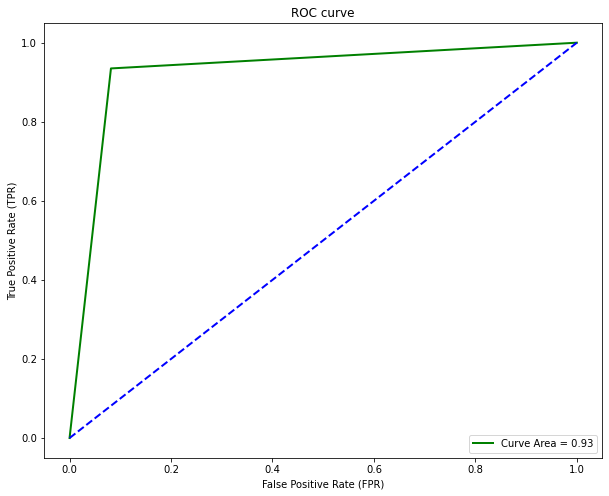

In [31]:
fpr, tpr, thr = roc_curve(y_test, pred)
auc = np.round(roc_auc_score(y_test, pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

>1, train: 1.000, test: 0.925
>2, train: 0.967, test: 0.916
>3, train: 0.960, test: 0.927
>4, train: 0.952, test: 0.927
>5, train: 0.948, test: 0.927
>6, train: 0.945, test: 0.927
>7, train: 0.943, test: 0.927
>8, train: 0.941, test: 0.927
>9, train: 0.940, test: 0.928
>10, train: 0.938, test: 0.927
>11, train: 0.937, test: 0.929
>12, train: 0.937, test: 0.929
>13, train: 0.935, test: 0.928
>14, train: 0.935, test: 0.927
>15, train: 0.934, test: 0.927
>16, train: 0.934, test: 0.927
>17, train: 0.933, test: 0.927
>18, train: 0.933, test: 0.926
>19, train: 0.933, test: 0.926


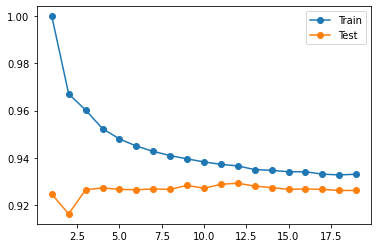

In [32]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

train_scores, test_scores = list(), list()
values = [i for i in range(1, 20)]
for i in values:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [33]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

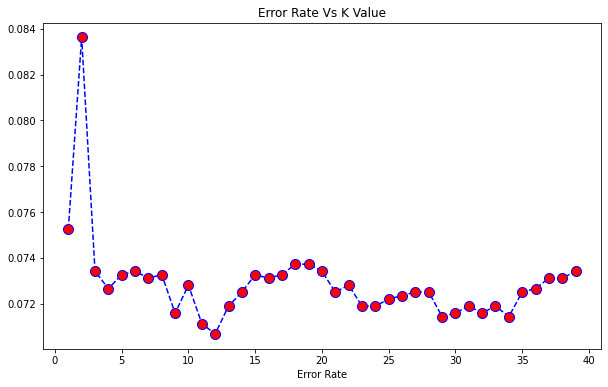

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title("Error Rate Vs K Value")

plt.xlabel('K')
plt.xlabel('Error Rate')
plt.show()

#### Determining the best value of K

In [35]:
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    
    confusion_matrix_ = confusion_matrix(y_test, pred)

    TN = confusion_matrix_[0,0]
   
    FN = confusion_matrix_[1,0]

    FP = confusion_matrix_[0,1]

    TP = confusion_matrix_[1,1]

    accuracy = accuracy_score(y_test,pred)
    
    precision = np.round(TP/(TP+FP), 2)
    recall = np.round(TP/(TP+FN), 2)
    f1_score_ = np.round((2*precision*recall)/(precision+recall), 2)
    
    print(i)
    print("Accuracy = ",accuracy)
    print("Precision = ", precision)
    print("Recall = ", recall)
    print("f1 score = ", f1_score_)
    print()

1
Accuracy =  0.9247524752475248
Precision =  0.92
Recall =  0.93
f1 score =  0.92

2
Accuracy =  0.9163747143945163
Precision =  0.95
Recall =  0.88
f1 score =  0.91

3
Accuracy =  0.9265803503427266
Precision =  0.92
Recall =  0.94
f1 score =  0.93

4
Accuracy =  0.9273419649657273
Precision =  0.94
Recall =  0.92
f1 score =  0.93

5
Accuracy =  0.9267326732673268
Precision =  0.92
Recall =  0.93
f1 score =  0.92

6
Accuracy =  0.9265803503427266
Precision =  0.94
Recall =  0.92
f1 score =  0.93

7
Accuracy =  0.9268849961919269
Precision =  0.93
Recall =  0.93
f1 score =  0.93

8
Accuracy =  0.9267326732673268
Precision =  0.93
Recall =  0.92
f1 score =  0.92

9
Accuracy =  0.9284082254379284
Precision =  0.93
Recall =  0.93
f1 score =  0.93

10
Accuracy =  0.9271896420411272
Precision =  0.93
Recall =  0.92
f1 score =  0.92

11
Accuracy =  0.9288651942117289
Precision =  0.93
Recall =  0.93
f1 score =  0.93

12
Accuracy =  0.9293221629855293
Precision =  0.93
Recall =  0.92
f1 scor

#### Hyperparameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
seed=50
knn_params = {   
    "n_neighbors": range(1, 20, 2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "leaf_size": range(1, 35, 5)
   
}

knn = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, n_jobs=1, cv=cv, scoring="accuracy", error_score=0)
grid_result = grid_search.fit(X_train,y_train)

kfinal_model = knn.set_params(**grid_result.best_params_)
kfinal_model.fit(X_train,y_train)
kpred = kfinal_model.predict(X_test)

print(classification_report(y_test, kpred))
print(confusion_matrix(y_test, kpred))

print(grid_result.best_params_)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3248
           1       0.94      0.94      0.94      3317

    accuracy                           0.94      6565
   macro avg       0.94      0.94      0.94      6565
weighted avg       0.94      0.94      0.94      6565

[[3036  212]
 [ 191 3126]]
{'leaf_size': 6, 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

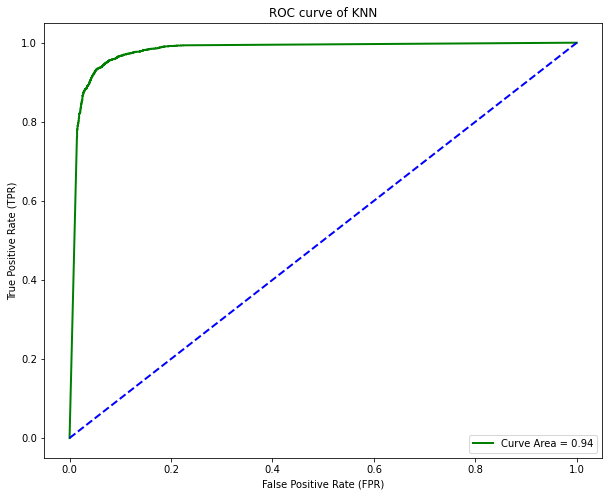

In [37]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, kpred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve of KNN')
plt.legend(loc="lower right")
plt.show()

#### Training Accuracy

In [38]:
predh = kfinal_model.predict(X_train)

In [39]:
accuracy = accuracy_score(y_train,predh)
print(accuracy)

0.9998095890932632


#### Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score,cross_val_predict
knnh_acc=cross_val_score(kfinal_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
knnh_proba=cross_val_predict(kfinal_model,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [41]:
knnh_acc.max()

0.9390708301599391

#### Test Accuracy

In [42]:
pred = kfinal_model.predict(X_test) 

In [43]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.9386138613861386


#### Confusion Matrix

In [44]:
confusion_matrix_ = confusion_matrix(y_test,pred)
print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test,pred))

confusion_matrix: 
 [[3036  212]
 [ 191 3126]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3248
           1       0.94      0.94      0.94      3317

    accuracy                           0.94      6565
   macro avg       0.94      0.94      0.94      6565
weighted avg       0.94      0.94      0.94      6565



In [45]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  3036
False Negatives =  191
False Positives =  212
True Positives =  3126


#### True Positive Rate, False Positive Rate

In [46]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.94
False Positive Rate =  0.07


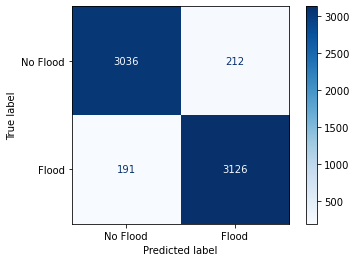

In [47]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test, 
                      display_labels=["No Flood", "Flood"],
                      cmap='Blues')
plt.show()

#### Decision Tree

In [48]:
X = df_feat.drop(['Sl','Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed', 'Bright_Sunshine','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period' ],axis=1)
y = df['Flood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=50)

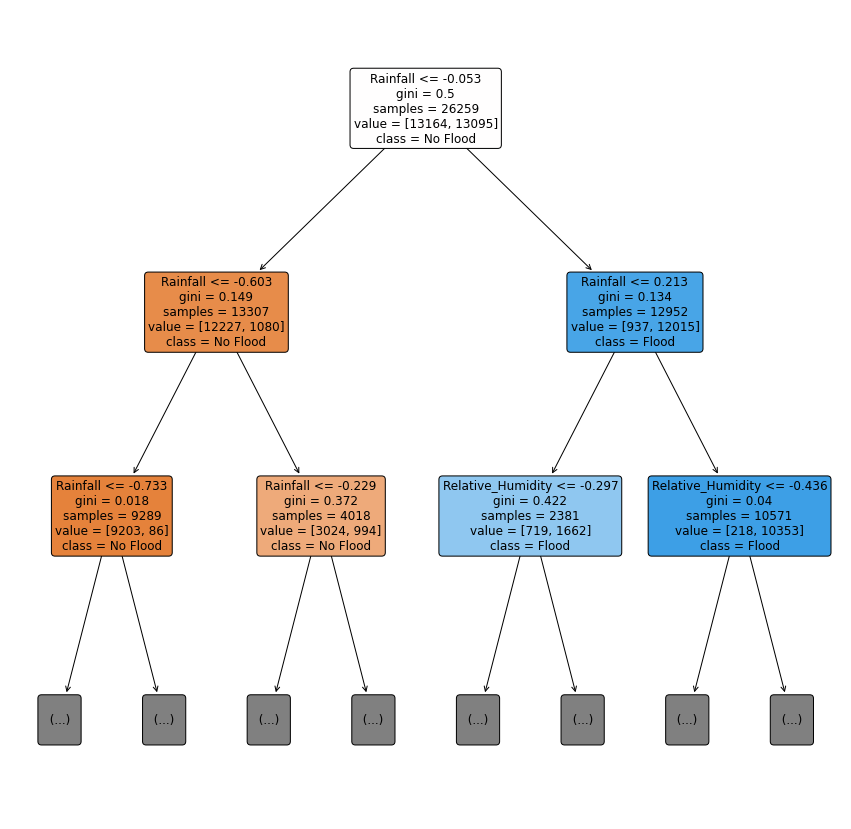

In [50]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(dtree, filled=True, rounded=True, class_names = ["No Flood", 'Flood'],
         feature_names = X.columns, max_depth=2, fontsize=12)

plt.show()

In [51]:
dpred = dtree.predict(X_test)

#### Confusion Matrix

In [52]:
confusion_matrix_ = confusion_matrix(y_test, dpred)
print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, dpred))

confusion_matrix: 
 [[3031  217]
 [ 224 3093]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3248
           1       0.93      0.93      0.93      3317

    accuracy                           0.93      6565
   macro avg       0.93      0.93      0.93      6565
weighted avg       0.93      0.93      0.93      6565



In [53]:
DTN = confusion_matrix_[0,0]
print("True Negatives = ", DTN)

DFN = confusion_matrix_[1,0]
print("False Negatives = ", DFN)

DFP = confusion_matrix_[0,1]
print("False Positives = ", DFP)

DTP = confusion_matrix_[1,1]
print("True Positives = ", DTP)

True Negatives =  3031
False Negatives =  224
False Positives =  217
True Positives =  3093


#### Test Accuracy

In [54]:
accuracy = accuracy_score(y_test,dpred)
print(accuracy)

0.9328255902513328


#### True Positive Rate, False Positive Rate

In [55]:
DTPR = np.round(DTP/(DTP+DFN), 2)
DFPR = np.round(DFP/(DFP+DTN), 2)

print("True Positive Rate = ", DTPR)
print("False Positive Rate = ", DFPR)

True Positive Rate =  0.93
False Positive Rate =  0.07


#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

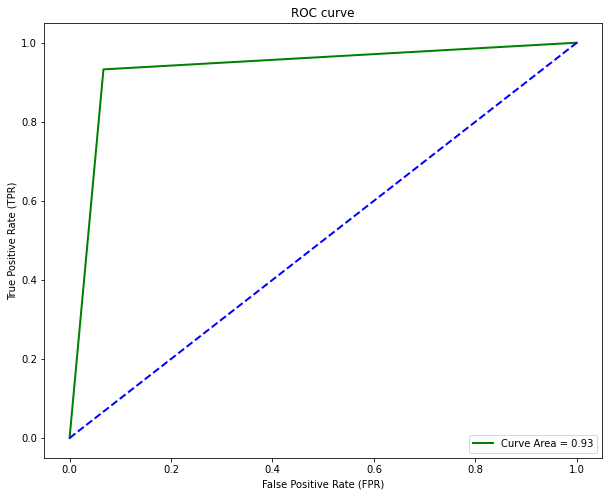

In [56]:
fpr, tpr, thr = roc_curve(y_test, dpred)
auc = np.round(roc_auc_score(y_test, dpred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Hyperparameter Tuning

In [57]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RepeatedStratifiedKFold
#seed=50
#dtree_params = {   
#    "max_depth": range(1, 20, 2),
#    "criterion": ['gini','entropy'],
#    "max_features": ['auto'],
#    "max_depth": range(3,20 , 1),
#   
#}
#
#dtree = DecisionTreeClassifier()
#
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
#grid_search = GridSearchCV(estimator=dtree, param_grid=dtree_params, n_jobs=1, cv=cv, scoring="accuracy", error_score=0)
#grid_result = grid_search.fit(X_train,y_train)
#
#dfinal_model = dtree.set_params(**grid_result.best_params_)
#dfinal_model.fit(X_train,y_train)
#dpredh = dfinal_model.predict(X_test)
#
#print(classification_report(y_test, dpredh))
#print(confusion_matrix(y_test, dpredh))
#
#print(grid_result.best_params_)

In [58]:
X = df_feat.drop(['Sl','Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed', 'Bright_Sunshine','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period' ],axis=1)
y = df['Flood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [59]:
dtreeh = DecisionTreeClassifier(criterion = 'gini', max_depth = 13, max_features = 'auto',random_state=50)
dtreeh.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=13, max_features='auto', random_state=50)

#### Training Accuracy

In [60]:
dpredh = dtreeh.predict(X_train)

In [61]:
accuracy = accuracy_score(y_train,dpredh)
print(accuracy)

0.9631745306371149


#### Cross Validation

In [62]:
from sklearn.model_selection import cross_val_score,cross_val_predict
dtc_acc=cross_val_score(dtreeh,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
dtc_proba=cross_val_predict(dtreeh,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [63]:
dtc_acc.max()

0.9306930693069307

#### Test Accuracy

In [64]:
dpredht = dtreeh.predict(X_test)

In [65]:
accuracy = accuracy_score(y_test,dpredht)
print(accuracy)

0.9343488194973344


In [117]:
confusion_matrix_ = confusion_matrix(y_test, dpredht)
print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, dpredht))

confusion_matrix: 
 [[3063  185]
 [ 246 3071]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3248
           1       0.94      0.93      0.93      3317

    accuracy                           0.93      6565
   macro avg       0.93      0.93      0.93      6565
weighted avg       0.93      0.93      0.93      6565



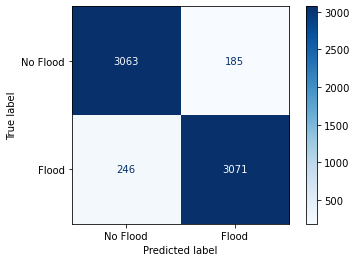

In [66]:
plot_confusion_matrix(dtreeh, 
                      X_test, 
                      y_test, 
                      display_labels=["No Flood", "Flood"],
                      cmap='Blues')
plt.show()

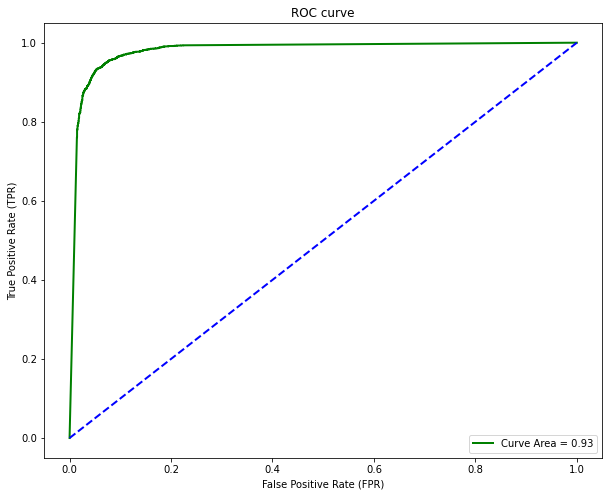

In [67]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, dpredht), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Random Forest

In [68]:
X = df_feat.drop(['Sl','Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed', 'Bright_Sunshine','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period' ],axis=1)
y = df['Flood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [69]:
from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier(n_estimators=200)
#n_estimators=48, 83, 100, 120
rfc = RandomForestClassifier(random_state=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

#### Training Accuracy

In [70]:
rfc_pred = rfc.predict(X_train)

In [71]:
accuracy = accuracy_score(y_train,rfc_pred)
print(accuracy)

0.9998095890932632


#### Cross Validation

In [72]:
from sklearn.model_selection import cross_val_score,cross_val_predict
rfc_acc=cross_val_score(rfc,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
rfc_proba=cross_val_predict(rfc,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [73]:
rfc_acc.max()

0.953922315308454

#### Test Accuracy

In [74]:
rfc_pred = rfc.predict(X_test)

In [75]:
accuracy = accuracy_score(y_test,rfc_pred)
print(accuracy)

0.9546077684691546


#### Confusion Matrix

In [76]:
confusion_matrix_ = confusion_matrix(y_test, rfc_pred)

print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, rfc_pred))

confusion_matrix: 
 [[3098  150]
 [ 148 3169]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3248
           1       0.95      0.96      0.96      3317

    accuracy                           0.95      6565
   macro avg       0.95      0.95      0.95      6565
weighted avg       0.95      0.95      0.95      6565



In [77]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  3098
False Negatives =  148
False Positives =  150
True Positives =  3169


#### True Positive Rate, False Positive Rate

In [78]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.96
False Positive Rate =  0.05


#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

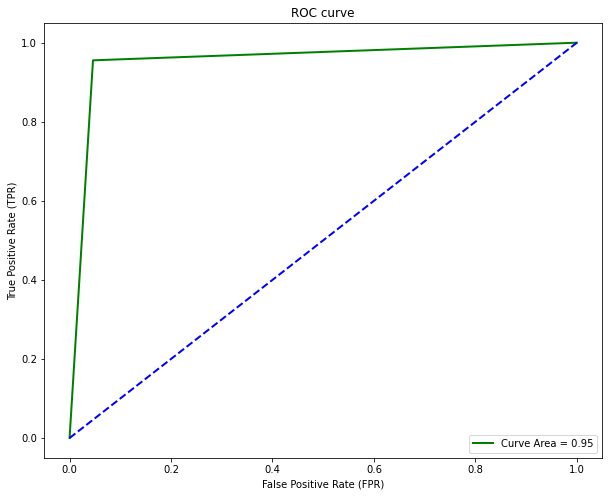

In [79]:
fpr, tpr, thr = roc_curve(y_test, rfc_pred)
auc = np.round(roc_auc_score(y_test, rfc_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


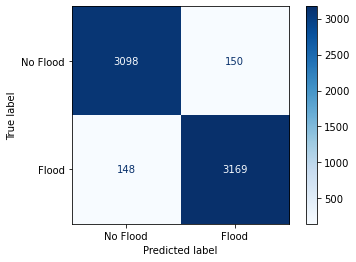

In [80]:
plot_confusion_matrix(rfc, 
                      X_test, 
                      y_test, 
                      display_labels=["No Flood", "Flood"],
                      cmap='Blues')
plt.show()

#### SVC

In [81]:
X = df_feat.drop(['Sl','Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed', 'Bright_Sunshine','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period' ],axis=1)
y = df['Flood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [82]:
from sklearn.svm import SVC
svc_algo = SVC(C=1000,gamma=1,random_state=50,probability=True)


In [83]:
svc_algo.fit(X_train,y_train)

SVC(C=1000, gamma=1, probability=True, random_state=50)

#### Training Accuracy

In [84]:
svc_pred = svc_algo.predict(X_train)

In [85]:
accuracy = accuracy_score(y_train,svc_pred)
print(accuracy)

0.9314520735747743


#### Cross Validation

In [86]:
from sklearn.model_selection import cross_val_score,cross_val_predict
svc_acc=cross_val_score(svc_algo,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
svc_proba=cross_val_predict(svc_algo,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [87]:
svc_acc.max()

0.9301218583396801

#### Test Accuracy

In [88]:
svc_pred = svc_algo.predict(X_test)

In [89]:
accuracy = accuracy_score(y_test,svc_pred)
print(accuracy)

0.9294744859101295


#### Confusion Matrix

In [90]:
confusion_matrix_ = confusion_matrix(y_test, svc_pred)
print('confusion_matrix: \n', confusion_matrix_)

print(classification_report(y_test, svc_pred))

confusion_matrix: 
 [[3015  233]
 [ 230 3087]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3248
           1       0.93      0.93      0.93      3317

    accuracy                           0.93      6565
   macro avg       0.93      0.93      0.93      6565
weighted avg       0.93      0.93      0.93      6565



In [91]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  3015
False Negatives =  230
False Positives =  233
True Positives =  3087


#### True Positive Rate, False Positive Rate

In [92]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.93
False Positive Rate =  0.07


#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

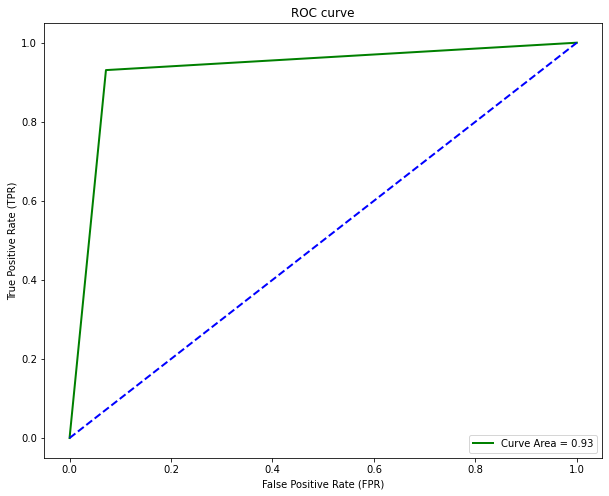

In [93]:
fpr, tpr, thr = roc_curve(y_test, svc_pred)
auc = np.round(roc_auc_score(y_test, svc_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

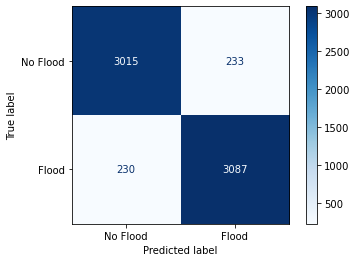

In [94]:
plot_confusion_matrix(svc_algo, 
                      X_test, 
                      y_test, 
                      display_labels=["No Flood", "Flood"],
                      cmap='Blues')
plt.show()

#### Xg Boost

In [19]:
X = df_feat.drop(['Sl','Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed', 'Bright_Sunshine','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period' ],axis=1)
y = df['Flood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [20]:
from xgboost import XGBClassifier

In [21]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=50, eval_metric="auc")

In [22]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=50,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Training Accuracy 

In [23]:
xgb_pred = xgb_model.predict(X_train)

In [24]:
accuracy = accuracy_score(y_train,xgb_pred)
print(accuracy)

0.9769221981035073


#### Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score,cross_val_predict
xgb_acc=cross_val_score(xgb_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
xgb_proba=cross_val_predict(xgb_model,X_train,y_train,cv=5,method='predict_proba')

#### Validation Accuracy

In [26]:
xgb_acc.max()

0.960967250571211

#### Test Accuracy

In [27]:
xgb_pred = xgb_model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test,xgb_pred)
print(accuracy)

0.9613099771515613


#### Confusion Matrix

In [29]:
confusion_matrix_ = confusion_matrix(y_test, xgb_pred)
print('confusion_matrix: \n', confusion_matrix_)

print(classification_report(y_test, xgb_pred))

confusion_matrix: 
 [[3140  108]
 [ 146 3171]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3248
           1       0.97      0.96      0.96      3317

    accuracy                           0.96      6565
   macro avg       0.96      0.96      0.96      6565
weighted avg       0.96      0.96      0.96      6565



In [30]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  3140
False Negatives =  146
False Positives =  108
True Positives =  3171


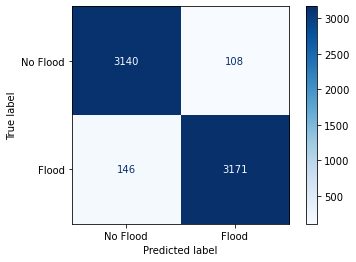

In [31]:
plot_confusion_matrix(xgb_model, 
                      X_test, 
                      y_test, 
                      display_labels=["No Flood", "Flood"],
                      cmap='Blues')
plt.show()

#### ROC: Receiver operating Characteristics and AUC: Area Under the Curve

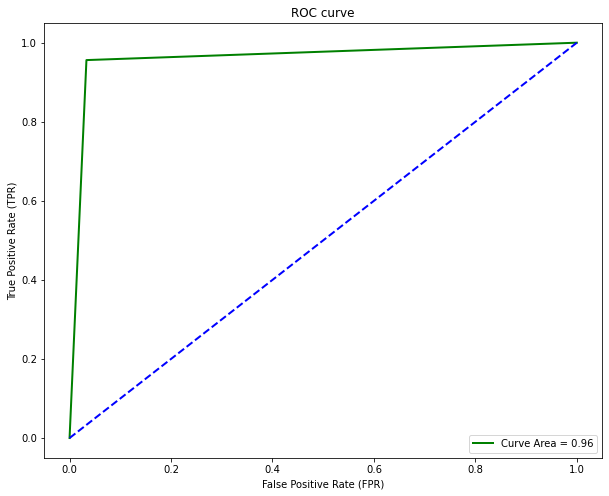

In [107]:
fpr, tpr, thr = roc_curve(y_test, xgb_pred)
auc = np.round(roc_auc_score(y_test, xgb_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [108]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
models.append(('KNN', KNeighborsClassifier(leaf_size = 6, metric ='manhattan', n_neighbors = 7, weights = 'distance')))
models.append(('DTC', DecisionTreeClassifier(criterion = 'gini', max_depth = 13, max_features = 'auto',random_state=50)))
models.append(('RFC', RandomForestClassifier(random_state=50)))
models.append(('SVC', SVC(C=1000,gamma=1,random_state=50,probability=True)))
models.append(('XG Boost', XGBClassifier(objective="binary:logistic", random_state=50, eval_metric="auc")))

names = []
scores = []
rec = []
pre = []
f = []
roc = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(round((accuracy_score(y_test, y_pred)*100), 2))
    pre.append(round((precision_score(y_test,y_pred)*100), 2))
    rec.append(round((recall_score(y_test,y_pred)*100), 2))           
    f.append(round((f1_score(y_test,y_pred)*100), 2))          
    roc.append(round((roc_auc_score(y_test,y_pred)*100), 2))
    
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Accuracy': scores, 'Precision': pre, 'Recall': rec, "F1-Score": f, "ROC Score": roc})
tr_split


,Name,Accuracy,Precision,Recall,F1-Score,ROC Score
0,KNN,93.86,93.65,94.24,93.94,93.86
1,DTC,93.43,94.32,92.58,93.44,93.44
2,RFC,95.46,95.48,95.54,95.51,95.46
3,SVC,92.95,92.98,93.07,93.02,92.95
4,XG Boost,96.13,96.71,95.60,96.15,96.14


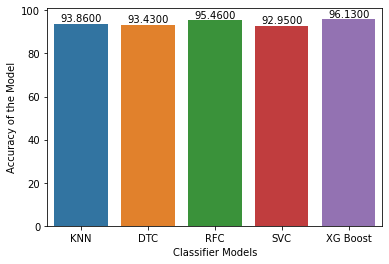

In [109]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Accuracy', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.90, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

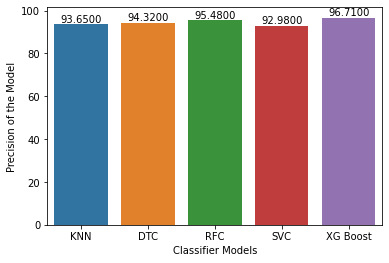

In [110]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Precision', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Precision of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.90, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

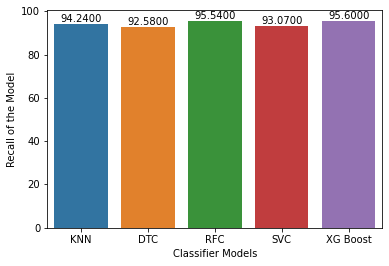

In [111]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Recall', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Recall of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.90, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

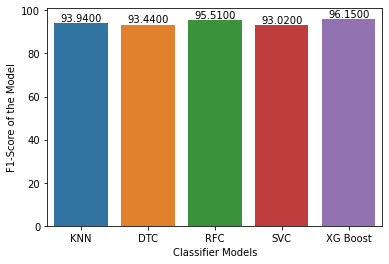

In [112]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'F1-Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='F1-Score of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.90, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

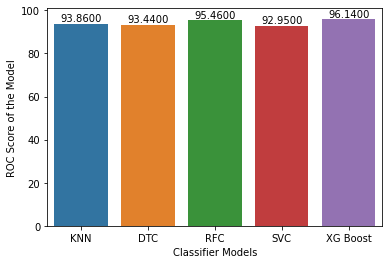

In [113]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'ROC Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='ROC Score of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.90, '{:1.4f}'.format(height), ha="center") 
    
plt.show()
